<center><h1>Gunadi_Eben_HW6</h1></center>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Tree-Based Methods

Import packages

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from imblearn.over_sampling import SMOTE

### (a) Download the APS Failure data

In [2]:
aps_failure_test_filepath = '../data/aps_failure_test_set.csv'
aps_failure_train_filepath = '../data/aps_failure_training_set.csv'

aps_failure_test_df = pd.read_csv(aps_failure_test_filepath, encoding='utf-8')
aps_failure_train_df = pd.read_csv(aps_failure_train_filepath, encoding='utf-8')

In [3]:
print(aps_failure_test_df.shape)
print(aps_failure_train_df.shape)

(16000, 171)
(60000, 171)


In [4]:
aps_failure_test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [5]:
aps_failure_train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

In [6]:
# Common imputation techniques include mean, median, mode, or a constant value. Will use mean for this exercise.

aps_failure_test_df = aps_failure_test_df.replace('na', 'NaN')
aps_failure_train_df = aps_failure_train_df.replace('na', 'NaN')

In [7]:
# Create a SimpleImputer object for mean imputation
imputer = SimpleImputer(strategy='mean')

# Perform mean imputation for missing values
aps_failure_test_df.iloc[:, 1:] = imputer.fit_transform(aps_failure_test_df.iloc[:, 1:])
aps_failure_train_df.iloc[:, 1:] = imputer.fit_transform(aps_failure_train_df.iloc[:, 1:])

In [8]:
aps_failure_test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [9]:
aps_failure_train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2130706438.0,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.0,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,228.0,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,70.0,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1368.0,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [10]:
# For each of the 170 features, calculate the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean.

aps_failure_total_df = pd.concat([aps_failure_test_df, aps_failure_train_df], ignore_index=True)

In [11]:
cv = aps_failure_total_df.iloc[:, 1:].std() / aps_failure_total_df.iloc[:, 1:].mean()
cv

aa_000      4.328608
ab_000      2.178397
ac_000      2.167648
ad_000    206.786809
ae_000     22.293998
             ...    
ee_007      4.885086
ee_008      3.335019
ee_009      5.753917
ef_000     47.925135
eg_000     45.648516
Length: 170, dtype: object

#### (iii) Plot a correlation matrix

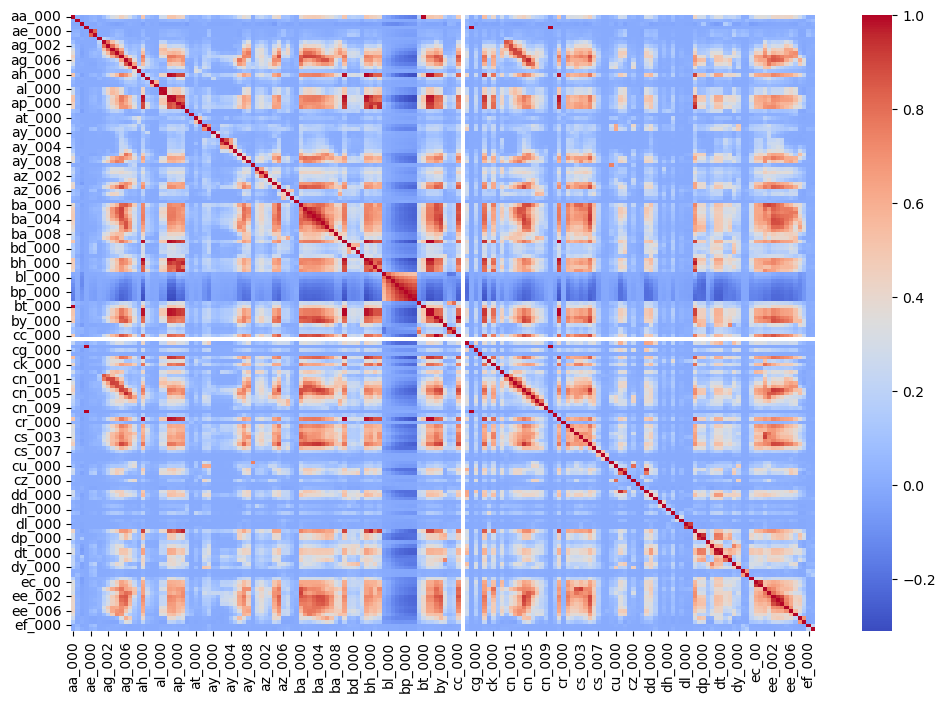

In [12]:
corr_matrix = aps_failure_total_df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

#### (iv) Make scatter plots and box plots

In [13]:
# Pick √170 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

cv_features = cv.sort_values(ascending=False).head(13).index
cv_features

Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000',
       'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009'],
      dtype='object')

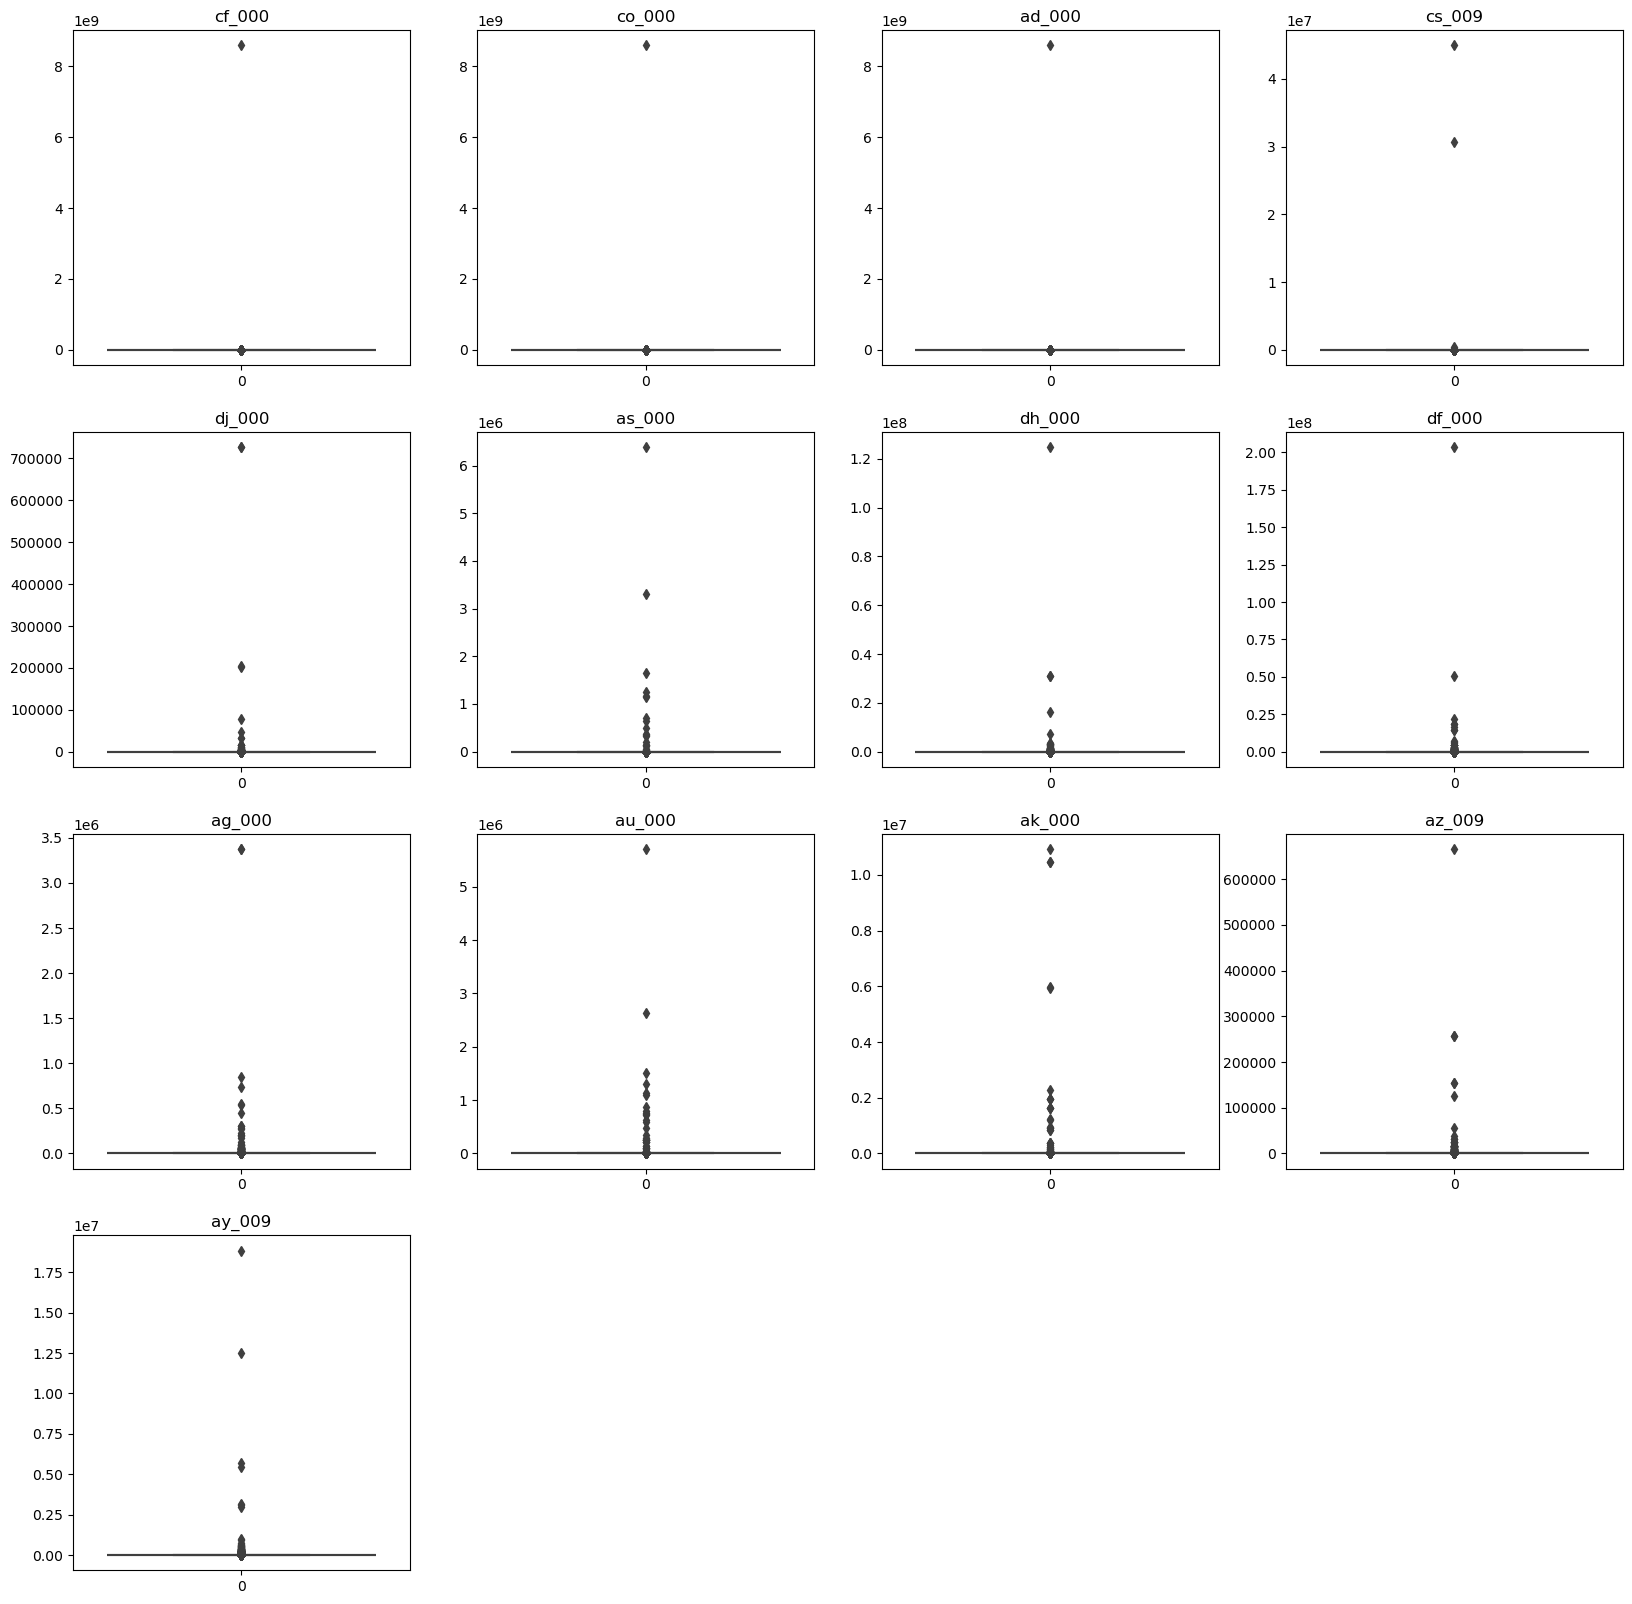

In [14]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(cv_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(aps_failure_total_df[feature])
    plt.title(feature)
plt.show()


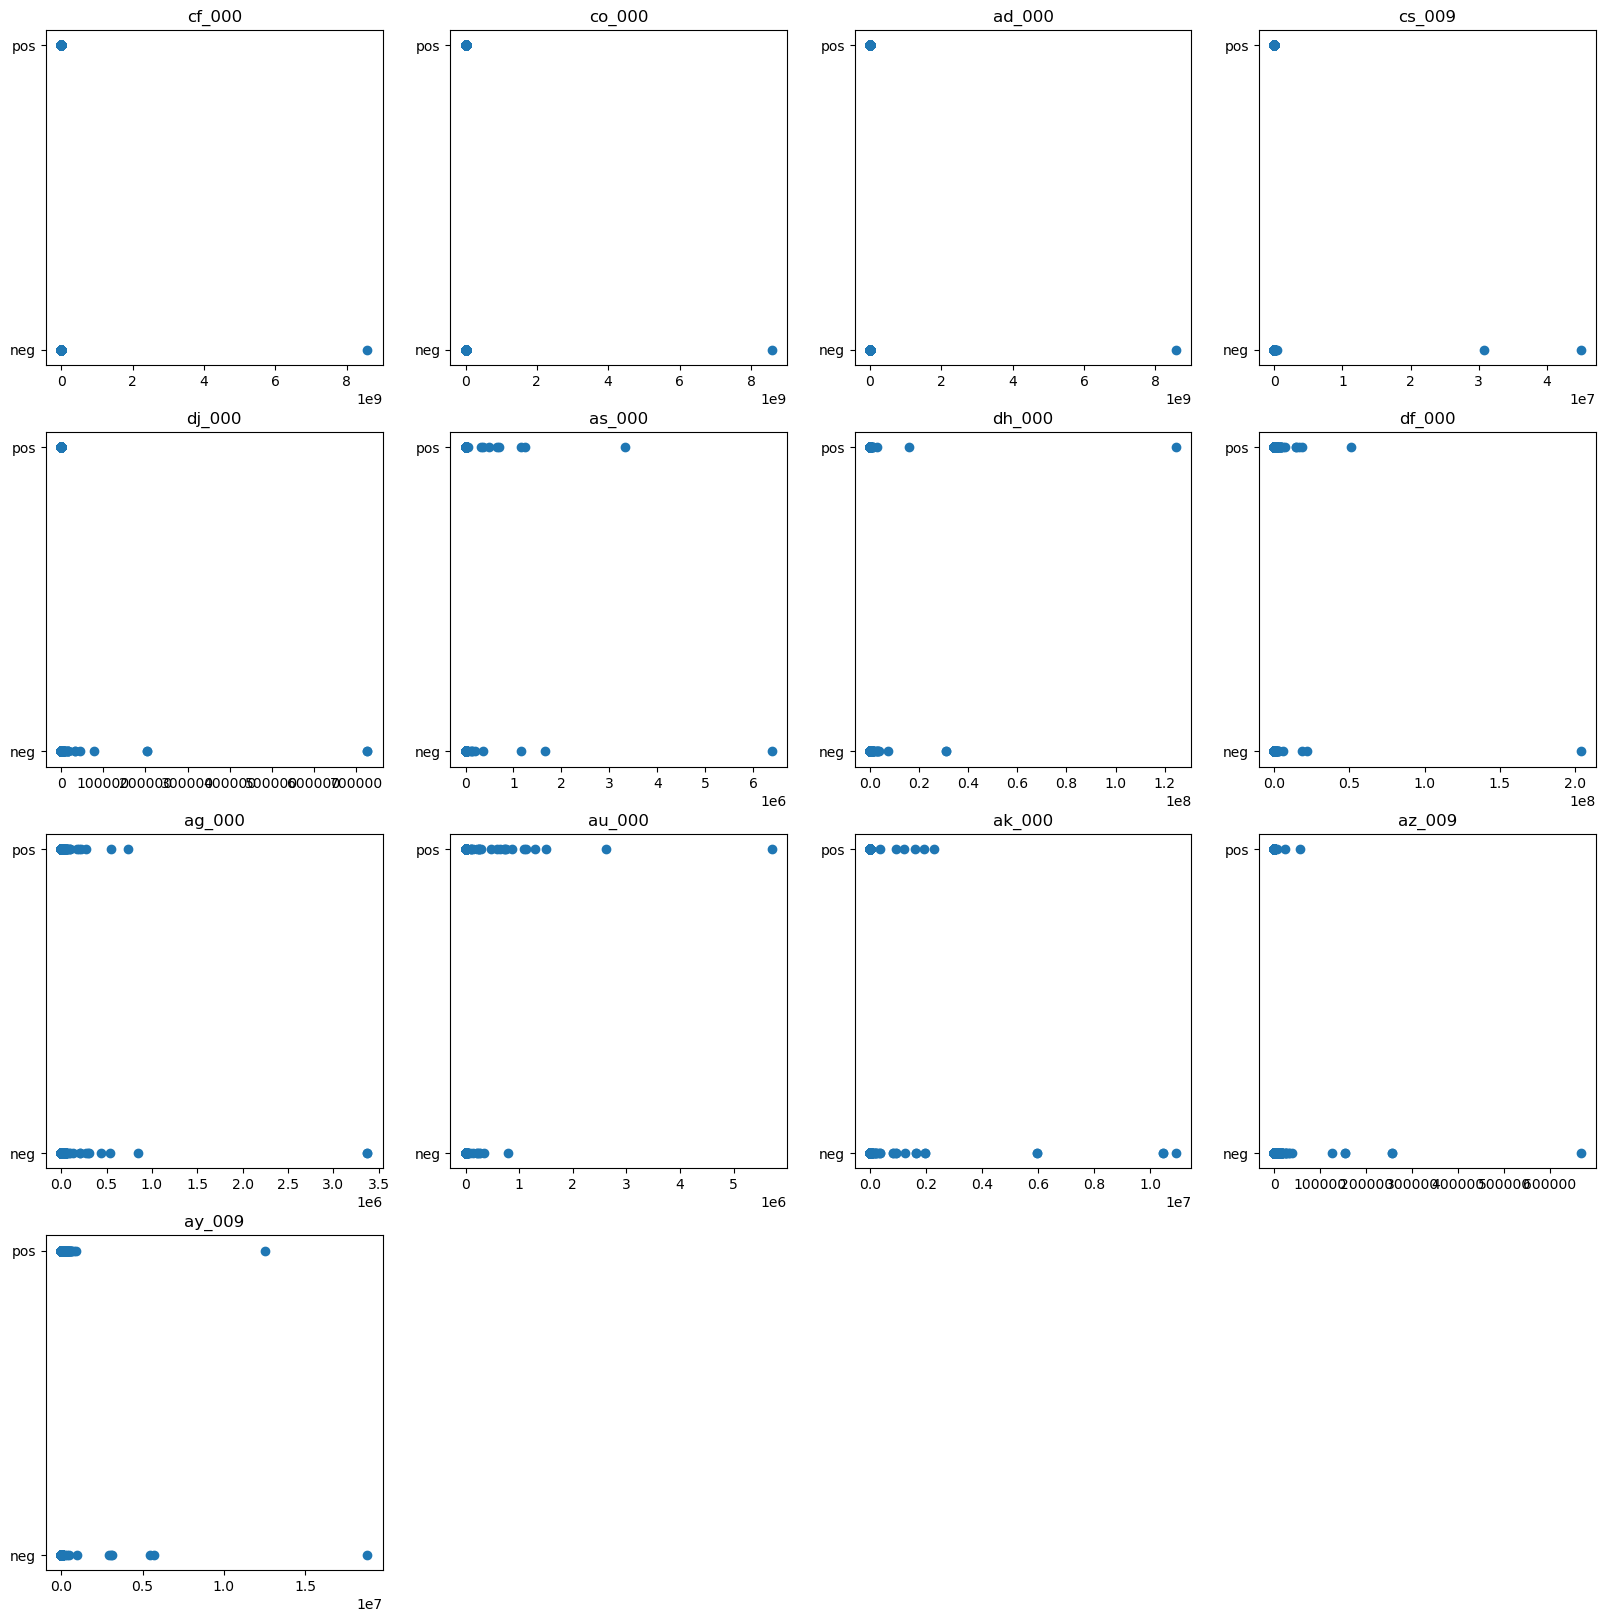

In [15]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(cv_features):
    plt.subplot(4, 4, i+1)
    plt.scatter(aps_failure_total_df[feature], aps_failure_total_df['class'])
    plt.title(feature)
plt.show()

Based on the scatter plots, feature `au_000` seems to have a high proportion of instances in the positive `class`.

#### (v) Is this data set imbalanced?

In [16]:
# Determine the number of positive and negative data. Is this data set imbalanced?

aps_failure_total_df['class'].value_counts()

class
neg    74625
pos     1375
Name: count, dtype: int64

Yes, the data set is imbalanced. There is a total of 74,625 negative instances and 1,375 positive instances, resulting in a ratio greater than 54:1, exceeding the rule of thumb of at least 10:1.

### (c) Train a random forest

In [17]:
# Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'class' column in both training and testing sets
aps_failure_test_df['class'] = label_encoder.fit_transform(aps_failure_test_df['class'])
aps_failure_train_df['class'] = label_encoder.fit_transform(aps_failure_train_df['class'])

X_train = aps_failure_train_df.iloc[:, 1:]
y_train = aps_failure_train_df['class']
X_test = aps_failure_test_df.iloc[:, 1:]
y_test = aps_failure_test_df['class']

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

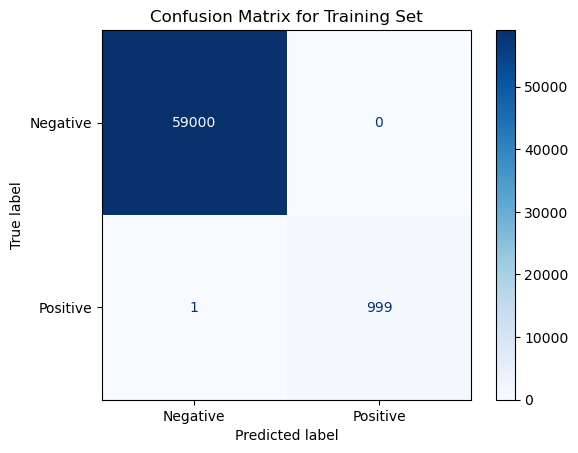

In [18]:
# Make predictions on training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Create a ConfusionMatrixDisplay from predictions
cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for training set
plt.title('Confusion Matrix for Training Set')
plt.show()


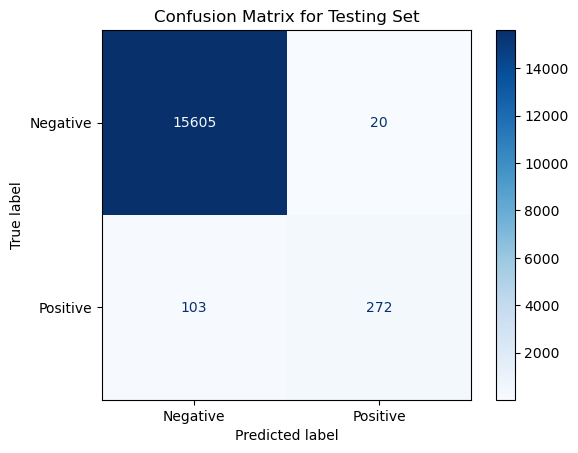

In [19]:
# Create a ConfusionMatrixDisplay from predictions
cm_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for testing set
plt.title('Confusion Matrix for Testing Set')
plt.show()

In [20]:
# Calculate probabilities on the training set
y_train_prob = rf.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)


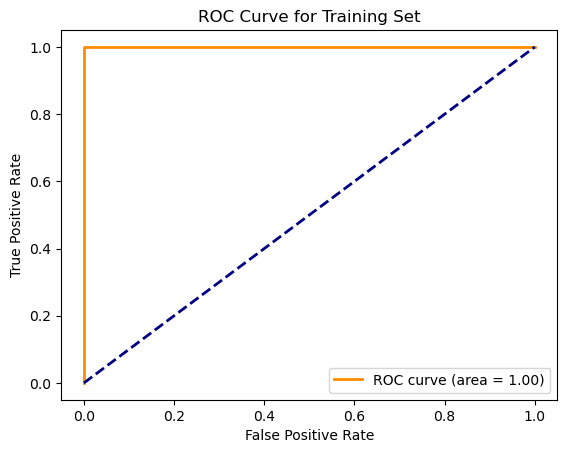

In [21]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Calculate probabilities on the testing set
y_test_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

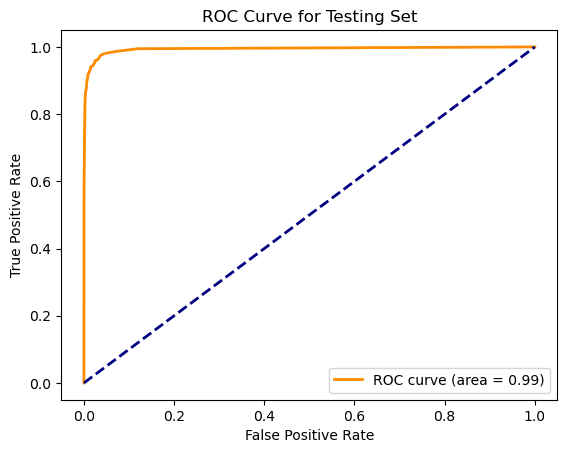

In [23]:
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set')
plt.legend(loc='lower right')
plt.show()

In [24]:
# Calculate Out-of-Bag error estimate
oob_error = 1 - rf.oob_score_

# Calculate test error
test_error = 1 - rf.score(X_test, y_test)

# Compare OOB error and test error
print("Out-of-Bag Error Estimate:", oob_error)
print("Test Error:", test_error)

Out-of-Bag Error Estimate: 0.00605
Test Error: 0.007687499999999958


As expected, the Out of Bag error is similar to the test error.

### (d) Research class imbalance in random forest

In [25]:
# To compensate for class imbalance, a common technique is to set the classifier's class_weight parameter to 'balanced'. This will adjust the class weights inversely proportional to the class frequencies.

rf_balanced = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

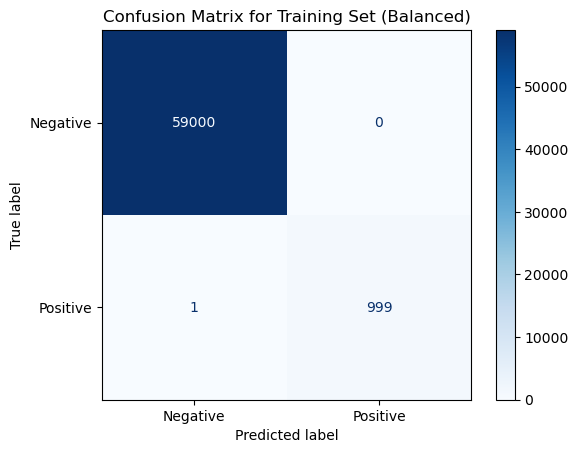

In [26]:
# Make predictions on training and testing sets
y_train_pred_balanced = rf_balanced.predict(X_train)
y_test_pred_balanced = rf_balanced.predict(X_test)

# Create a ConfusionMatrixDisplay from predictions
cm_display_train_balanced = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_balanced, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for training set
plt.title('Confusion Matrix for Training Set (Balanced)')
plt.show()

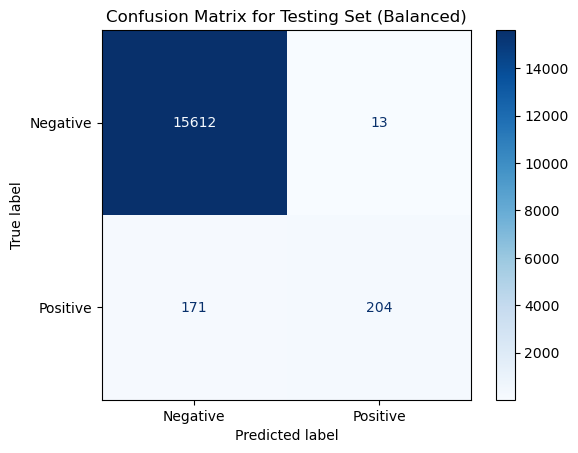

In [27]:
# Create a ConfusionMatrixDisplay from predictions
cm_display_test_balanced = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_balanced, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for testing set
plt.title('Confusion Matrix for Testing Set (Balanced)')
plt.show()

In [28]:
# Calculate probabilities on the training set
y_train_prob_balanced = rf_balanced.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC for the training set
fpr_train_balanced, tpr_train_balanced, thresholds_train_balanced = roc_curve(y_train, y_train_prob_balanced)
roc_auc_train_balanced = auc(fpr_train_balanced, tpr_train_balanced)

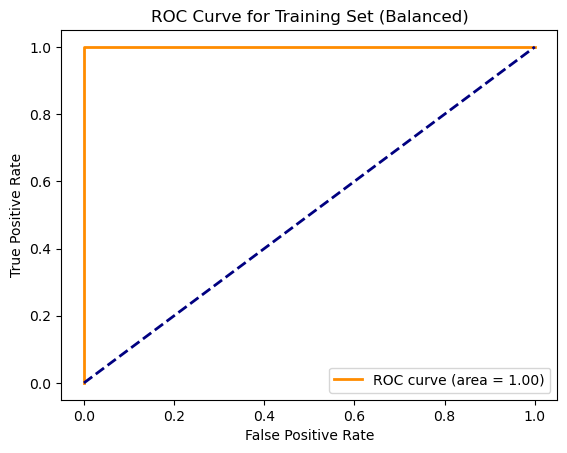

In [29]:
plt.figure()
plt.plot(fpr_train_balanced, tpr_train_balanced, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_balanced)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Balanced)')
plt.legend(loc='lower right')
plt.show()

In [30]:
# Calculate probabilities on the testing set
y_test_prob_balanced = rf_balanced.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for the testing set
fpr_test_balanced, tpr_test_balanced, thresholds_test_balanced = roc_curve(y_test, y_test_prob_balanced)
roc_auc_test_balanced = auc(fpr_test_balanced, tpr_test_balanced)

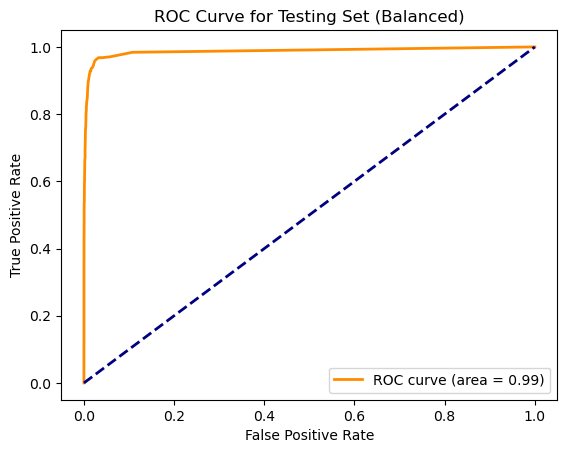

In [31]:
plt.figure()
plt.plot(fpr_test_balanced, tpr_test_balanced, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_balanced)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set (Balanced)')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Calculate Out-of-Bag error estimate
oob_error_balanced = 1 - rf_balanced.oob_score_

# Calculate test error
test_error_balanced = 1 - rf_balanced.score(X_test, y_test)

# Compare OOB error and test error
print("Out-of-Bag Error Estimate (Balanced):", oob_error_balanced)
print("Test Error (Balanced):", test_error_balanced)

Out-of-Bag Error Estimate (Balanced): 0.007683333333333375
Test Error (Balanced): 0.011499999999999955


After adjusting class weights to compensate for imbalance, the test error is almost twice that of the Out of Bag error.

### (e) XGBoost and Model Trees

In [83]:
# In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using X_j > s as the decision rule, one has ∑j β_j X_j > s as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
# One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

# Ensure datatypes are compatible with XGBoost
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Define the XGBoost model with L1-penalized logistic regression
xgb_model = xgb.XGBClassifier(tree_method='hist', booster='gbtree', objective='binary:logistic', reg_alpha=0)

# Define the range of alpha values to test
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]

# Create a parameter grid for grid search
param_grid = {'reg_alpha': alphas}

# Perform grid search with 5-fold cross-validation
grid_search_5fold = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_5fold.fit(X_train, y_train)

# Get the best alpha value
best_alpha_5fold = grid_search_5fold.best_params_['reg_alpha']
print("Best Alpha (5-Fold CV):", best_alpha_5fold)

Best Alpha (5-Fold CV): 0.5


In [84]:
# Perform grid search with 10-fold cross-validation
grid_search_10fold = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search_10fold.fit(X_train, y_train)

# Get the best alpha value
best_alpha_10fold = grid_search_10fold.best_params_['reg_alpha']
print("Best Alpha (10-Fold CV):", best_alpha_10fold)

Best Alpha (10-Fold CV): 0.5


Skipping LOOCV due to time constraints

In [85]:
"""
# Perform grid search with leave-one-out cross-validation
loo = LeaveOneOut()
grid_search_loo = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=loo, scoring='accuracy')
grid_search_loo.fit(X_train, y_train)

# Get the best alpha value
best_alpha_loo = grid_search_loo.best_params_['reg_alpha']
print("Best Alpha (Leave-One-Out CV):", best_alpha_loo)
"""

'\n# Perform grid search with leave-one-out cross-validation\nloo = LeaveOneOut()\ngrid_search_loo = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=loo, scoring=\'accuracy\')\ngrid_search_loo.fit(X_train, y_train)\n\n# Get the best alpha value\nbest_alpha_loo = grid_search_loo.best_params_[\'reg_alpha\']\nprint("Best Alpha (Leave-One-Out CV):", best_alpha_loo)\n'

In [86]:
# Best alpha value is 0.5 per 5 and 10-fold cross-validation
best_alpha = 0.5

In [87]:
# Train the XGBoost model with the best alpha
best_xgb_model = xgb.XGBClassifier(tree_method='hist', booster='gbtree', objective='binary:logistic', reg_alpha=best_alpha)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

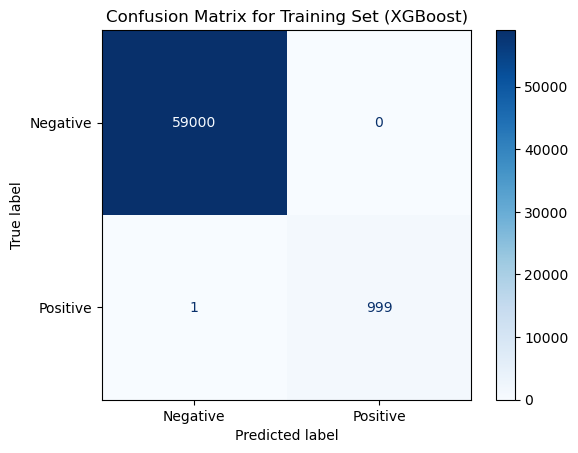

In [88]:
# Make predictions on training and testing sets
y_train_pred_xgb = best_xgb_model.predict(X_train)
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Create a ConfusionMatrixDisplay from predictions
cm_display_train_xgb = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_xgb, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for training set
plt.title('Confusion Matrix for Training Set (XGBoost)')
plt.show()


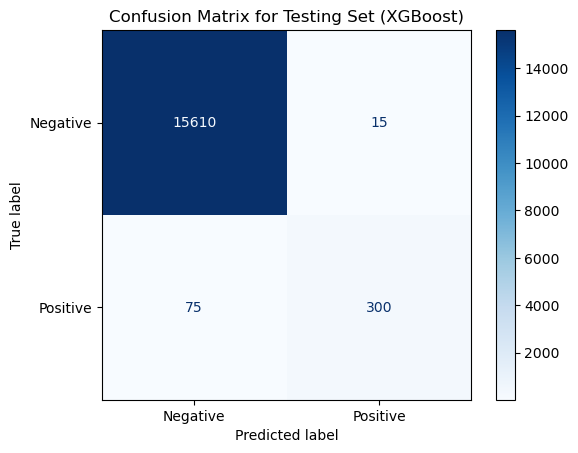

In [89]:
# Create a ConfusionMatrixDisplay from predictions
cm_display_test_xgb = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_xgb, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for testing set
plt.title('Confusion Matrix for Testing Set (XGBoost)')
plt.show()

In [90]:
# Calculate probabilities on the training set
y_train_prob_xgb = best_xgb_model.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC for the training set
fpr_train_xgb, tpr_train_xgb, thresholds_train_xgb = roc_curve(y_train, y_train_prob_xgb)
roc_auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)

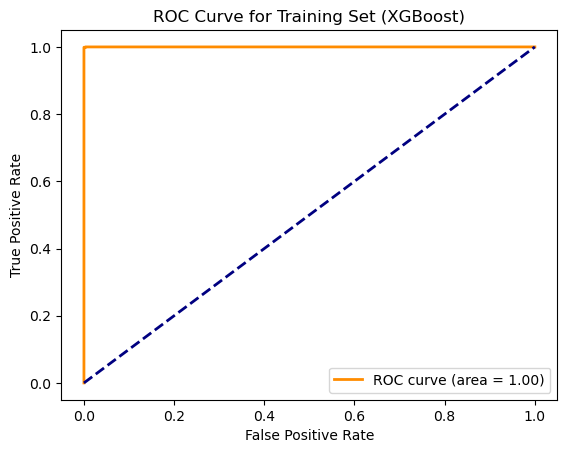

In [91]:
plt.figure()
plt.plot(fpr_train_xgb, tpr_train_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (XGBoost)')
plt.legend(loc='lower right')
plt.show()

In [92]:
# Calculate probabilities on the testing set
y_test_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for the testing set
fpr_test_xgb, tpr_test_xgb, thresholds_test_xgb = roc_curve(y_test, y_test_prob_xgb)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

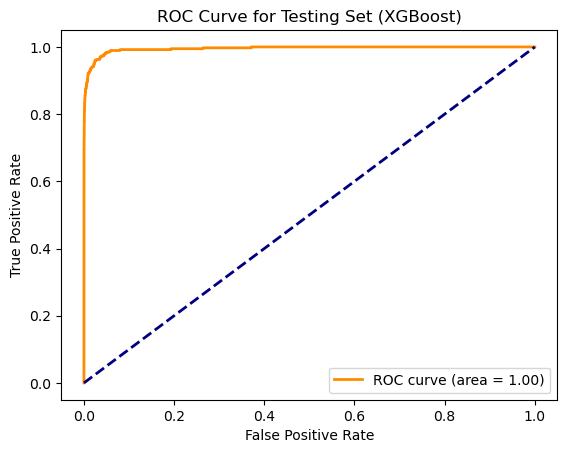

In [93]:
plt.figure()
plt.plot(fpr_test_xgb, tpr_test_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set (XGBoost)')
plt.legend(loc='lower right')
plt.show()

In [94]:
# Calculate the 5-fold cross-validation error
cv_error_5fold = 1 - grid_search_5fold.best_score_

# Calculate the 10-fold cross-validation error
cv_error_10fold = 1 - grid_search_10fold.best_score_

# Calculate test error
test_error_xgb = 1 - best_xgb_model.score(X_test, y_test)

# Compare 5-fold CV error, 10-fold CV error, and test error
print("5-Fold Cross-Validation Error:", cv_error_5fold)
print("10-Fold Cross-Validation Error:", cv_error_10fold)
print("Test Error (XGBoost):", test_error_xgb)

5-Fold Cross-Validation Error: 0.005166666666666542
10-Fold Cross-Validation Error: 0.005149999999999877
Test Error (XGBoost): 0.005624999999999991


### (f) Use SMOTE to pre-process your data

In [95]:
# Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBoost with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

# Initialize SMOTE object
smote = SMOTE(random_state=42)

# Perform SMOTE on the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Perform grid search with 5-fold cross-validation
grid_search_5fold_smote = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_5fold_smote.fit(X_train_smote, y_train_smote)

# Get the best alpha value
best_alpha_5fold_smote = grid_search_5fold_smote.best_params_['reg_alpha']
print("Best Alpha (5-Fold CV with SMOTE):", best_alpha_5fold_smote)


Best Alpha (5-Fold CV with SMOTE): 0.5


In [96]:
# Perform grid search with 10-fold cross-validation
grid_search_10fold_smote = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search_10fold_smote.fit(X_train_smote, y_train_smote)

# Get the best alpha value
best_alpha_10fold_smote = grid_search_10fold_smote.best_params_['reg_alpha']
print("Best Alpha (10-Fold CV with SMOTE):", best_alpha_10fold_smote)

Best Alpha (10-Fold CV with SMOTE): 0.1


Skipping LOOCV due to time constraints

In [97]:
"""
# Perform grid search with leave-one-out cross-validation
loo = LeaveOneOut()
grid_search_loo_smote = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=loo, scoring='accuracy')
grid_search_loo_smote.fit(X_train_smote, y_train_smote)

# Get the best alpha value
best_alpha_loo_smote = grid_search_loo_smote.best_params_['reg_alpha']
print("Best Alpha (Leave-One-Out CV with SMOTE):", best_alpha_loo_smote)
"""

'\n# Perform grid search with leave-one-out cross-validation\nloo = LeaveOneOut()\ngrid_search_loo_smote = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=loo, scoring=\'accuracy\')\ngrid_search_loo_smote.fit(X_train_smote, y_train_smote)\n\n# Get the best alpha value\nbest_alpha_loo_smote = grid_search_loo_smote.best_params_[\'reg_alpha\']\nprint("Best Alpha (Leave-One-Out CV with SMOTE):", best_alpha_loo_smote)\n'

In [100]:
# Since 10-fold is generally more accurate than 5-fold, we will use the best alpha from 10-fold cross-validation
best_alpha_smote = 0.5

In [101]:
# Train the XGBoost model with the best alpha
best_xgb_model_smote = xgb.XGBClassifier(tree_method='hist', booster='gbtree', objective='binary:logistic', reg_alpha=best_alpha_smote)
best_xgb_model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

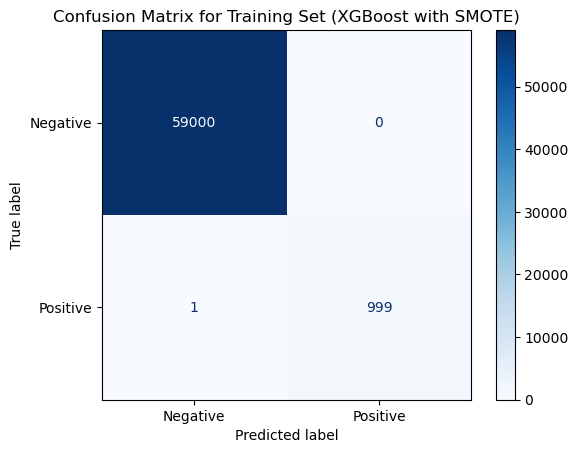

In [102]:
# Make predictions on training and testing sets
y_train_pred_xgb_smote = best_xgb_model_smote.predict(X_train)
y_test_pred_xgb_smote = best_xgb_model_smote.predict(X_test)

# Create a ConfusionMatrixDisplay from predictions
cm_display_train_xgb_smote = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_xgb_smote, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for training set
plt.title('Confusion Matrix for Training Set (XGBoost with SMOTE)')
plt.show()

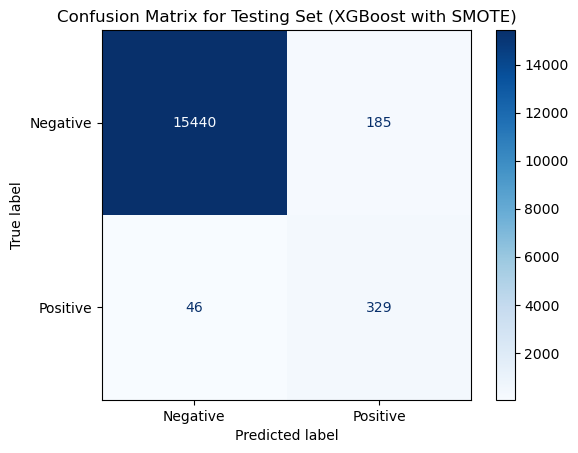

In [103]:
# Create a ConfusionMatrixDisplay from predictions
cm_display_test_xgb_smote = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_xgb_smote, display_labels=['Negative', 'Positive'], cmap='Blues')

# Plot the confusion matrix for testing set
plt.title('Confusion Matrix for Testing Set (XGBoost with SMOTE)')
plt.show()

In [104]:
# Calculate probabilities on the training set
y_train_prob_xgb_smote = best_xgb_model_smote.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC for the training set
fpr_train_xgb_smote, tpr_train_xgb_smote, thresholds_train_xgb_smote = roc_curve(y_train, y_train_prob_xgb_smote)
roc_auc_train_xgb_smote = auc(fpr_train_xgb_smote, tpr_train_xgb_smote)

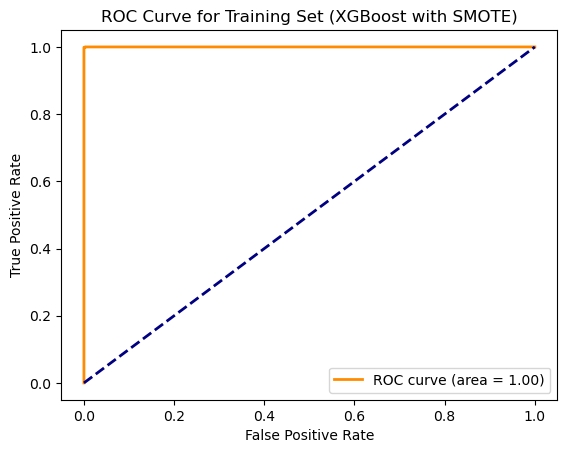

In [105]:
plt.figure()
plt.plot(fpr_train_xgb_smote, tpr_train_xgb_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_xgb_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (XGBoost with SMOTE)')
plt.legend(loc='lower right')
plt.show()

In [106]:
# Calculate probabilities on the testing set
y_test_prob_xgb_smote = best_xgb_model_smote.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for the testing set
fpr_test_xgb_smote, tpr_test_xgb_smote, thresholds_test_xgb_smote = roc_curve(y_test, y_test_prob_xgb_smote)
roc_auc_test_xgb_smote = auc(fpr_test_xgb_smote, tpr_test_xgb_smote)

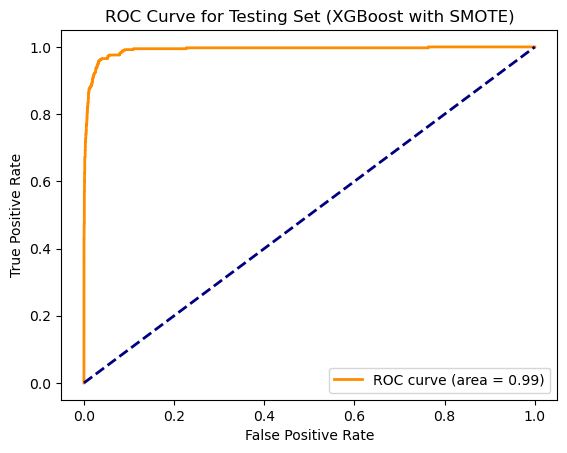

In [107]:
plt.figure()
plt.plot(fpr_test_xgb_smote, tpr_test_xgb_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_xgb_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set (XGBoost with SMOTE)')
plt.legend(loc='lower right')
plt.show()

In [108]:
# Calculate the 5-fold cross-validation error
cv_error_5fold_smote = 1 - grid_search_5fold_smote.best_score_

# Calculate the 10-fold cross-validation error
cv_error_10fold_smote = 1 - grid_search_10fold_smote.best_score_

# Calculate test error
test_error_xgb_smote = 1 - best_xgb_model_smote.score(X_test, y_test)

# Compare 5-fold CV error, 10-fold CV error, and test error
print("5-Fold Cross-Validation Error (SMOTE):", cv_error_5fold_smote)
print("10-Fold Cross-Validation Error (SMOTE):", cv_error_10fold_smote)
print("Test Error (XGBoost with SMOTE):", test_error_xgb_smote)

5-Fold Cross-Validation Error (SMOTE): 0.002423728813559345
10-Fold Cross-Validation Error (SMOTE): 0.0021186440677964935
Test Error (XGBoost with SMOTE): 0.014437499999999992


After appling SMOTE to compensate for imbalance, the test error is almost twice that of the Cross-Validation errors.

## 2. ISLR 6.6.3

(a) iv. Steadily decrease: When s = 0, β's are also 0 and training error is at a maximum. As s increases, the error decreases to its RSS.

(b) ii. Decrease initially, and then eventually start increasing in a U shape: Similar to scenario (a), except that overfitting to the training data occurs at a certain point, increasing the test RSS.

(c) iii. Steadily increase: As s increases more β's are included, increasing dependence on the training data and having higher variance.

(d) iv. Steadily decrease: The opposite of scenario (c).

(e) v. Remain constant: Irreducible error is inherrent noise that is present regardless of the chosen model.

## 3. ISLR 6.6.5

(a) For ridge regression optimization, we aim to minimize:

$ \sum_{i=1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \hat{\beta}_2 x_{i2})^2 + \lambda \sum_{j=1}^{p} \hat{\beta}_j^2 $

Since $ \hat{\beta}_0 = 0 $ and $ n = p = 2 $, this can be simplified to

$ (y_i - \hat{\beta}_1 x_{11} - \hat{\beta}_2 x_{12})^2 + (y_i - \hat{\beta}_1 x_{21} - \hat{\beta}_2 x_{22})^2 + \lambda(\hat{\beta}_1^2 + \hat{\beta}_2^2) $


(b) Given $ x_{11} = x_{12} $ and $ x_{21} = x_{22} $ and a zero intercept, ridge coefficient estimates $ \hat{\beta}_1 $ and $ \hat{\beta}_2 $ are symmetrical in the expression shown in (a).

(c) For lasso regression optimization, we aim to minimize:

$ (y_i - \hat{\beta}_1 x_{11} - \hat{\beta}_2 x_{12})^2 + (y_i - \hat{\beta}_1 x_{21} - \hat{\beta}_2 x_{22})^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|) $

(d) The lasso coefficients $ \hat{\beta}_1 $ and $ \hat{\beta}_2 $ are not unique because lasso penalty is diamond-shaped and can have multiple solutions where the sum of their absolute values are equal.

## 4. ISLR 8.4.5

In [118]:
p_red = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

# Majority approach
if sum(p_red >= 0.5) > sum(p_red < 0.5):
    print("Majority Approach: Red")
else:
    print("Majority Approach: Green")

# Average approach
if np.mean(p_red) >= 0.5:
    print("Average Approach: Red")
else:
    print("Average Approach: Green")


Majority Approach: Red
Average Approach: Green


## 5. ISLR 9.7.3

In [119]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]

Text(0, 0.5, 'X2')

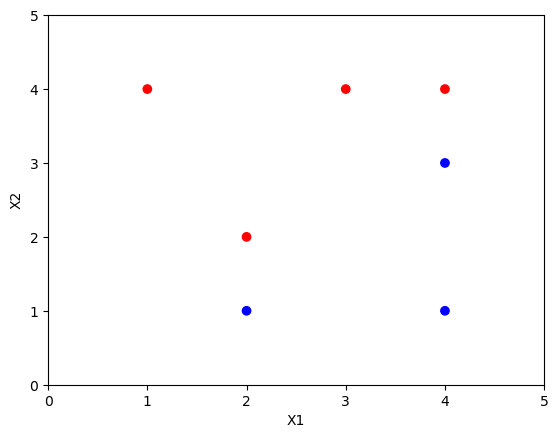

In [121]:
# (a) Sketch the observations.

plt.scatter(x1, x2, c=colors)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("X1")
plt.ylabel("X2")

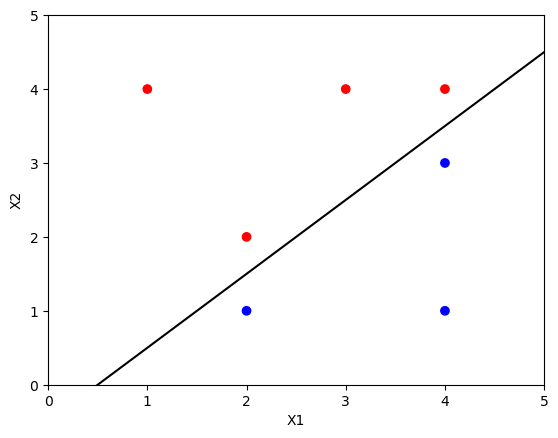

In [138]:
# (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form β_0 + β_1 X_1 + β_2 X_2 = 0).

# Equation for the optimal separating hyperplane: 0.5 - X1 + X2 = 0

plt.scatter(x1, x2, c=colors)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("X1")
plt.ylabel("X2")

# Plot the optimal separating hyperplane
plt.plot([0, 5], [-0.5, (1*5 - 0.5)], color='black')

(c) Classify to Red if 0.5 - X1 + X2 > 0, and classify to Blue otherwise.

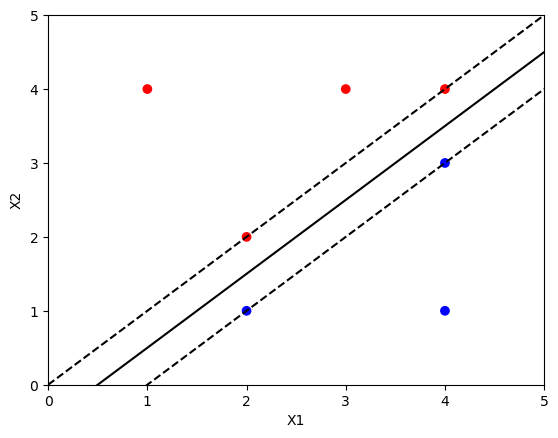

In [141]:
# (d) On your sketch, indicate the margin for the maximal margin hyperplane.

plt.scatter(x1, x2, c=colors)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("X1")
plt.ylabel("X2")

# Plot the optimal separating hyperplane
plt.plot([0, 5], [-0.5, (1*5 - 0.5)], color='black')

# Plot the margin for the maximal margin hyperplane
plt.plot([0, 5], [-1, (1*5 - 1)], linestyle='--', color='black')
plt.plot([0, 5], [0, (1*5 - 0)], linestyle='--', color='black')


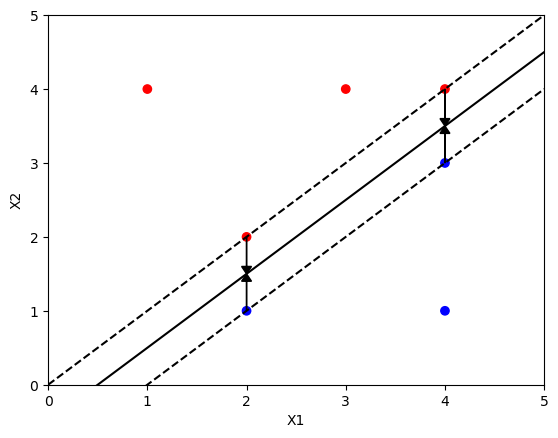

In [149]:
# (e) Indicate the support vectors for the maximal margin classifier.

plt.scatter(x1, x2, c=colors)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("X1")
plt.ylabel("X2")

# Plot the optimal separating hyperplane
plt.plot([0, 5], [-0.5, (1*5 - 0.5)], color='black')

# Plot the margin for the maximal margin hyperplane
plt.plot([0, 5], [-1, (1*5 - 1)], linestyle='--', color='black')
plt.plot([0, 5], [0, (1*5 - 0)], linestyle='--', color='black')

# Plot the support vectors
plt.arrow(2, 1, 0, 0.5 - 0.1, head_width=0.1, head_length=0.1, fc='black', ec='black')
plt.arrow(2, 2, 0, -0.5 + 0.1, head_width=0.1, head_length=0.1, fc='black', ec='black')
plt.arrow(4, 4, 0, -0.5 + 0.1, head_width=0.1, head_length=0.1, fc='black', ec='black')
plt.arrow(4, 3, 0, 0.5 - 0.1, head_width=0.1, head_length=0.1, fc='black', ec='black')


(f) A slight movement of the seventh observation (4,1) would not affect the maximal margin hyperplane since it lies outside the margin.

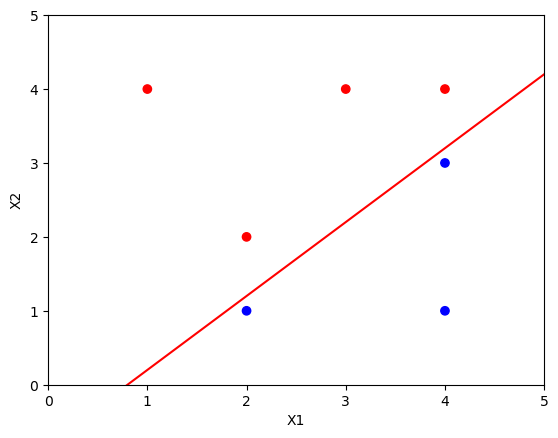

In [155]:
# (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

# Equation for the non-optimal separating hyperplane: 0.8 - X1 + X2 = 0

plt.scatter(x1, x2, c=colors)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("X1")
plt.ylabel("X2")

# Plot the non-optimal separating hyperplane
plt.plot([0, 5], [-0.8, (1*5 - 0.8)], color='red')

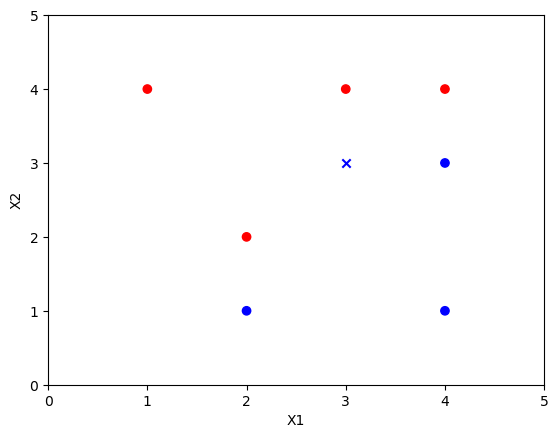

In [154]:
# (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

plt.scatter(x1, x2, c=colors)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("X1")
plt.ylabel("X2")

# Plot the additional observation
plt.scatter(3, 3, c='blue', marker='x')

## References and Citations

- https://stackoverflow.com/questions/47606873/jupyter-no-module-named-imblearn-after-installation